# IBM Applied Data Science Capstone Course by Coursera


### Importing Modules and libraries

In [204]:
import pandas as pd
import numpy as np
import requests
import lxml.html as lh
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import folium # map rendering library
import json
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

### Importing dataset and storing in DataSet

In [4]:
website_url = requests.get('https://ceodelhi.gov.in/Content/EntireDelhiLocalities.aspx').text

In [5]:
soup = BeautifulSoup(website_url,'lxml')

In [6]:
table = soup.find_all('table', attrs={'width':"607"})

In [7]:
from IPython.display import display_html
tab = str(table)
display_html(tab,raw=True)

[ 
 
 
 
   
   
   
 
 
 AC_NO 
 AC NAME 
 IMPORTANT LOCALITIES 
 
 
 1 
 NERELA 
   SECTOR-A6 NARELA 
 
 
   VIJAY NAGAR NARELA 
 
 
 (METRO VIHAR PHASE-I)HOLAMBI KALAN 
 
 
 (METRO VIHAR PHASE-II)HOLAMBI KALAN 
 
 
 DESU COLONY NARELA 
 
 
 GAUTAM COLONY NARELA 
 
 
 INDRA COLONY 
 
 
 MATRO VIHAR HOLAMBI KHURD 
 
 
 METRO VIHAR HOLAMBI KHURD 
 
 
 NAI BASTI MAMURPUR PANA UDYAN NARELA 
 
 
 NARELA MANDI 
 
 
 NEW PUNJABI COLONY NARELA 
 
 
 PANA MAMURPUR NARELA 
 
 
 PANA PAPOSIAN NARELA 
 
 
 PANA UDYAN NARELA 
 
 
 PREM COLONY 
 
 
 RAJEEV COLONY NARELA 
 
 
 RAVIDHASS NAGAR NARELA 
 
 
 RESETLEMENT GAUTAM COLONY NARELA 
 
 
 SANJAY COLONY NARELA 
 
 
 SEC A-5 NARELA 
 
 
 SEC-27 KHERA KALAN 
 
 
 SECTOR-A6 NARELA 
 
 
 SHIVAJI NAGAR NARELA 
 
 
 SWATANTAR NAGAR 
 
 
 VILL   LAMPUR 
 
 
 VILL AKBARPUR MAJRA 
 
 
 VILL BAKHTAWARPUR 
 
 
 VILL BAKOULI 
 
 
 VILL BANKNER 
 
 
 VILL BHORGARH 
 
 
 VILL BUDHPUR 
 
 
 VILL GHOGA 
 
 
 VILL HAMIDPUR 
 
 
 VILL HIRANKI 
 
 
 VILL HIRANKI (KUSHAK) 
 
 
 VILL HOLAMBI KALAN 
 
 
 VILL HOLAMBI KHURD 
 
 
 VILL IRADAT NAGAR (NAYA BANS) 
 
 
 VILL JHANGOLA 
 
 
 VILL JINDPUR 
 
 
 VILL KHAMPUR 
 
 
 VILL KHERA KALAN 
 
 
 VILL KHERA KHURD 
 
 
 VILL KURENI 
 
 
 VILL KURENI SEC-A-10 
 
 
 VILL PALLA 
 
 
 VILL PALLA KULAKPUR 
 
 
 VILL SANOTH 
 
 
 VILL SHAHPUR GARHI 
 
 
 VILL SINGHOLA 
 
 
 VILL SINGHU 
 
 
 VILL SUNGERPUR 
 
 
 VILL TAJPUR KALAN 
 
 
 VILL TIGIPUR 
 
 
 VILL TIKRI KHURD 
 
 
 VILLAGE ALIPUR 
 
 
 2 
 BURARI 
 BURARI 
 
 
 IBRAHIMPUR 
 
 
 JAHANGIRPURI RESTTLEMENT CLY 
 
 
 JAHANGIRPURI RESTTLEMENTS CLY 
 
 
 NATHUPURA 
 
 
 VILL MUKANDPUR 
 
 
 VILLAGE   NANGLI POONA 
 
 
 VILLAGE IBRAHIMPUR 
 
 
 VILLAGE JAGATPUR 
 
 
 VILLAGE KADIPUR 
 
 
 VILLAGE MUKHMELPUR 
 
 
 VILLAGE NANGLI POONA 
 
 
 3 
 TIMARPUR 
 B D ESTATE 
 
 
 B R HOSPITAL 
 
 
 BHAI PARMANAND COLONY 
 
 
 BHAI PERMANAND COLONY (EAST) 
 
 
 BHAI PERMANAND COLONY (WEST) 
 
 
 DDA FLATS MALL ROAD 
 
 
 DELHI ADMN FLATS TIMARPUR 
 
 
 DELHI UNIVERSITY CHHATRA MARG 
 
 
 DHAKA MCD COLONY 
 
 
 DHAKA VILLAGE 
 
 
 G T B NAGAR 
 
 
 GOPAL PUR VILLAGE 
 
 
 GTB NAGAR 
 
 
 HAKIKAT NAGAR 
 
 
 INDIRA BASTI TIMARPUR 
 
 
 INDRA VIHAR 
 
 
 INDRA VIKAS COLONY 
 
 
 KABIR BASTI 
 
 
 KARORI MAL COLLEGE 
 
 
 LANCERS ROAD 
 
 
 MALKA GANJ 
 
 
 MUKHERJEE NAGAR 
 
 
 MUKHERJEE NAGAR (WEST) 
 
 
 MUNSHI RAM COLONY 
 
 
 NEHRU VIHAR 
 
 
 OLD SUBZI MANDI 
 
 
 PATEL CHEST JHUGGI PARMANAND COLONY 
 
 
 SABZI MANDI 
 
 
 SABZI MANDI, GHANTA GHAR 
 
 
 SANJAY BASTI 
 
 
 SANJAY BASTI TIMARPUR 
 
 
 ST STEPHEN'S COLLEGE DELHI UNIVERSITY 
 
 
 SUBZI MANDI 
 
 
 TAGORE PARK 
 
 
 TIMARPUR 
 
 
 TIMARPUR DELHI 
 
 
 UNIVERSITY AREA SHRI RAM INSTITUTE 
 
 
 VIJAY NAGAR 
 
 
 VILLAGE MALIK PUR 
 
 
 WAZIRABAD 
 
 
 WAZIRABAD VILLAGE 
 
 
 WAZIRADBAD 
 
 
 4 
 ADARSH NAGAR 
 ADARSH NAGAR 
 
 
 AZADPUR 
 
 
 DDA FLAT JAHANGIR PURI 
 
 
 GANDHI VIHAR 
 
 
 GOPAL NAGAR 
 
 
 INDIRA NAGAR 
 
 
 JAHANGIR PURI 
 
 
 KEWAL PARK 
 
 
 KEWAL PARK EXTENTION 
 
 
 MAHENDRA PARK 
 
 
 MAJILIS PARK 
 
 
 MCD/DJB FLATS MODEL TOWN-III 
 
 
 MODEL TOWN-II, POLICE COLONY 
 
 
 MODEL TOWN-III, MOHAN PARK 
 
 
 MODEL TOWN-III, R-BLOCK 
 
 
 NIRANKARI CLOLNY 
 
 
 PANCHVATI 
 
 
 RAM GARH 
 
 
 RAMESHWAR NAGAR 
 
 
 SANJAY ENCLAVE 
 
 
 SANJAY NAGAR 
 
 
 SARAI PIPAL THALA 
 
 
 VILLAGE BHAROLA 
 
 
 VILLAGE DHIRPUR 
 
 
 5 
 BADLI 
 
 BADLI VILLAGE 
 
 
 BHALSWA DAIRY 
 
 
 CHANDAN PARK 
 
 
 INDUSTRIAL AREA SAMAY PUR 
 
 
 JAHANGIRPURI RESETTLEMENT COLONY 
 
 
 LIBAS PUR 
 
 
 LIBAS PUR VILL. 
 
 
 SAMAY PUR 
 
 
 SIRAS PUR VILL. 
 
 
 SIRAS VILL. 
 
 
 SWAROOP NAGAR 
 
 
 SWAROOP NAGAR. 
 
 
 VILLAGE BHALSWA 
 
 
 VILLAGE SAMAY PUR 
 
 
 VILLAGE SIRAS PUR 
 
 
 YADAV NAGAR 
 
 
 6 
 RITHALA 
 BUDH VIHAR 
 
 
 RITHALA VILLAGE 
 
 
 ROHINI SEC 11 
 
 
 ROHINI SEC-1 
 
 
 ROHINI SEC-1 AVANTIKA 
 
 
 ROHINI SEC-4 
 
 
 ROHINI SEC-5 
 
 
 ROHINI SECTOR-16 
 
 
 SEC-16 ROHINI 
 
 
 SEC-17 ROHINI 
 
 
 SECTOR-6 ROHINI 
 
 
 VIJAY VIHAR 
 
 
 7 
 BAWA

In [8]:
Delhis = pd.read_html(tab)
Delhi= Delhis[0]
Delhi.columns = ['Constituency Number', 'Constituency Name', 'Area']

In [9]:
Delhi.head()

,Constituency Number,Constituency Name,Area
0,NaN,NaN,NaN
1,AC_NO,AC NAME,IMPORTANT LOCALITIES
2,1,NERELA,SECTOR-A6 NARELA
3,1,NERELA,VIJAY NAGAR NARELA
4,1,NERELA,(METRO VIHAR PHASE-I)HOLAMBI KALAN


### Data Cleaning and Preprocessing

#### Deleting NaN rows

In [10]:
Delhi = Delhi.dropna()

#### Deleting first row

In [11]:
Delhi = Delhi.drop([1])

In [12]:
Delhi.reset_index(drop=True)

,Constituency Number,Constituency Name,Area
0,1,NERELA,SECTOR-A6 NARELA
1,1,NERELA,VIJAY NAGAR NARELA
2,1,NERELA,(METRO VIHAR PHASE-I)HOLAMBI KALAN
3,1,NERELA,(METRO VIHAR PHASE-II)HOLAMBI KALAN
4,1,NERELA,DESU COLONY NARELA
...,...,...,...
2284,70,KARAWAL NAGAR,TUKMIRPUR & VILL
2285,70,KARAWAL NAGAR,TUKMIRPUR EXTN
2286,70,KARAWAL NAGAR,VILL KHAJOORI KHAS
2287,70,KARAWAL NAGAR,WEST KAMAL VIHAR


### Grouping the Constituencies

In [13]:
delhi_area = Delhi.groupby(['Constituency Number', 'Constituency Name'], sort=False).agg( ', '.join)

In [14]:
delhi_area.reset_index(inplace=True)

In [15]:
delhi_area.head()

,Constituency Number,Constituency Name,Area
0,1,NERELA,"SECTOR-A6 NARELA, VIJAY NAGAR NARELA, (METRO V..."
1,2,BURARI,"BURARI, IBRAHIMPUR, JAHANGIRPURI RESTTLEMENT C..."
2,3,TIMARPUR,"B D ESTATE, B R HOSPITAL, BHAI PARMANAND COLON..."
3,4,ADARSH NAGAR,"ADARSH NAGAR, AZADPUR, DDA FLAT JAHANGIR PURI,..."
4,5,BADLI,"BADLI VILLAGE, BHALSWA DAIRY, CHANDAN PARK, IN..."


In [16]:
delhi_area.shape

(70, 3)

### Getting the geographical coodinates

In [17]:
# define a function to get coordinates
def get_latlng(constiuency):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Delhi, India'.format(constiuency))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [18]:
coords = [ get_latlng(neighborhood) for neighborhood in delhi_area["Constituency Name"].tolist() ]

In [19]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

###  Merge the coordinates into the original dataframe

In [158]:
delhi_area['Latitude'] = df_coords['Latitude']
delhi_area['Longitude'] = df_coords['Longitude']

In [159]:
delhi_area

,Constituency Number,Constituency Name,Area,Latitude,Longitude
0,1,NERELA,"SECTOR-A6 NARELA, VIJAY NAGAR NARELA, (METRO V...",28.839790,77.076960
1,2,BURARI,"BURARI, IBRAHIMPUR, JAHANGIRPURI RESTTLEMENT C...",28.756600,77.206950
2,3,TIMARPUR,"B D ESTATE, B R HOSPITAL, BHAI PARMANAND COLON...",28.700780,77.221160
3,4,ADARSH NAGAR,"ADARSH NAGAR, AZADPUR, DDA FLAT JAHANGIR PURI,...",28.720350,77.172640
4,5,BADLI,"BADLI VILLAGE, BHALSWA DAIRY, CHANDAN PARK, IN...",28.731650,77.134060
...,...,...,...,...,...
65,66,GHONDA,"4TH PUSTA KARTAR NAGAR J-BLOCK, A-BLOCK BHAJAN...",28.690197,77.269925
66,67,BABARPUR,"BABAR PUR VILLAGE (EAST BABAR PUR), BALBIR NAG...",28.507380,77.303460
67,68,GOKALPUR,"BHAGIRATHI VIHAR, EAST GOKALPUR, GANGA VIHAR, ...",28.703600,77.282940
68,69,MUSTAFABAD,"AMAR VIHAR, AMBIKA VIHAR, BABU NAGAR, BHAGAT V...",28.714800,77.274990


### Getting the coordinates of Delhi, India

In [104]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi, India 28.6517178, 77.2219388.


### Building the map of Delhi, India

In [105]:
map_dl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(delhi_area['Latitude'], delhi_area['Longitude'], delhi_area['Constituency Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_dl)  
    
map_dl

###  Saving the Map of Delhi

In [106]:
map_dl.save('map_dl.html')

### Setting the FourSquare API Credentials

In [121]:
# define Foursquare Credentials and Version
CLIENT_ID = '0XNQDFXFBWF0KPH5RMN4C0II0AZIZEJ4T21MOKMTOMVBG2YE' # your Foursquare ID
CLIENT_SECRET = 'THGOHDWEQNKG4YVTYZGKHLNYI05ZL4SXX1F3DKNGLAJPH3AM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0XNQDFXFBWF0KPH5RMN4C0II0AZIZEJ4T21MOKMTOMVBG2YE
CLIENT_SECRET:THGOHDWEQNKG4YVTYZGKHLNYI05ZL4SXX1F3DKNGLAJPH3AM


### Getting the first 500 venues in 5000 m radius for each constituencies

In [176]:
radius = 5000
LIMIT = 500

venues = []

for lat, long, neighborhood in zip(delhi_area['Latitude'], delhi_area['Longitude'], delhi_area['Constituency Name']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [188]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(4686, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,NERELA,28.83979,77.07696,Batra matching center,28.845399,77.089483,Women's Store
1,NERELA,28.83979,77.07696,Axis Bank ATM,28.825870,77.086430,ATM
2,NERELA,28.83979,77.07696,Chetanalaya Bawana Slum,28.805791,77.054423,Campground
3,NERELA,28.83979,77.07696,The Jehan,28.845557,77.124682,Resort
4,NERELA,28.83979,77.07696,Rohini West Station,28.802868,77.103460,Metro Station


In [189]:
venues_df[venues_df['VenueCategory'] == 'Shopping Mall'].count()

Neighborhood      109
Latitude          109
Longitude         109
VenueName         109
VenueLatitude     109
VenueLongitude    109
VenueCategory     109
dtype: int64

# Analyzing each Neighbourhood

In [191]:
# one hot encoding
dl_one = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dl_one['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dl_one.columns[-1]] + list(dl_one.columns[:-1])
dl_one = dl_one[fixed_columns]

print(dl_one.shape)
dl_one.head()

(4686, 171)


,Neighborhoods,ATM,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,...,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Zoo
0,NERELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,NERELA,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NERELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NERELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NERELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [192]:
dl_grouped = dl_one.groupby(["Neighborhoods"]).mean().reset_index()
print(dl_grouped.shape)
dl_grouped

(70, 171)


,Neighborhoods,ATM,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,...,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Zoo
0,ADARSH NAGAR,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0
1,AMBEDKAR NAGAR (SC),0.0,0.0,0.0,0.0,0.0,0.020000,0.000000,0.0,0.0,...,0.01,0.000000,0.010000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0
2,BABARPUR,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.000000,0.030303,0.0,0.0,0.00,0.0,0.0,0.0
3,BADARPUR,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.000000,0.030303,0.0,0.0,0.00,0.0,0.0,0.0
4,BADLI,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TUGHLAKABAD,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.021739,0.010870,0.0,0.0,0.00,0.0,0.0,0.0
66,UTTAM NAGAR,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0
67,VIKASPURI,0.0,0.0,0.0,0.0,0.0,0.013889,0.000000,0.0,0.0,...,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0
68,VISHWAS NAGAR,0.0,0.0,0.0,0.0,0.0,0.000000,0.030303,0.0,0.0,...,0.00,0.015152,0.000000,0.015152,0.0,0.0,0.00,0.0,0.0,0.0


In [193]:
len(dl_grouped[dl_grouped["Shopping Mall"] > 0])


43

**Create a new DataFrame for Shopping Mall data only**

In [194]:
dl_shopping_mall = dl_grouped[["Neighborhoods","Shopping Mall"]]

In [199]:
dl_shopping_mall

,Neighborhoods,Shopping Mall
0,ADARSH NAGAR,0.044118
1,AMBEDKAR NAGAR (SC),0.020000
2,BABARPUR,0.030303
3,BADARPUR,0.030303
4,BADLI,0.072727
...,...,...
65,TUGHLAKABAD,0.000000
66,UTTAM NAGAR,0.035714
67,VIKASPURI,0.027778
68,VISHWAS NAGAR,0.060606


# K- Means Cluster Constituencies

### Using elbow method to choose best number of clusters

In [202]:
wcss =  []
dl_shopping_mall_clustering = dl_shopping_mall.drop(["Neighborhoods"], 1)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dl_shopping_mall_clustering)
    wcss.append(kmeans.inertia_)

### Visualizing the plot

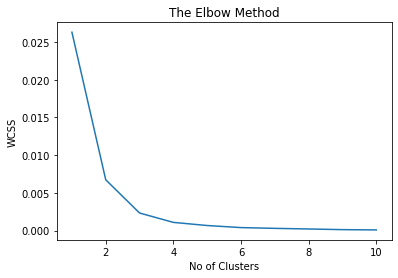

In [205]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

**According to Graph we will be taking n cluster as 4**

In [207]:
#Applying the Kmeans Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(dl_shopping_mall_clustering)


In [210]:
kmeans.labels_

array([1, 3, 3, 3, 2, 0, 0, 3, 0, 0, 1, 3, 0, 2, 0, 0, 0, 3, 0, 3, 0, 3,
       0, 0, 2, 0, 3, 1, 3, 1, 3, 3, 0, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 3, 0, 1, 1, 1, 3, 3, 3, 3, 1, 0, 0, 2, 0, 3, 0, 3, 1, 0,
       1, 3, 2, 1])

In [213]:
dl_merged = dl_shopping_mall.copy()

# add clustering labels
dl_merged["Cluster Labels"] = kmeans.labels_

In [214]:
dl_merged.rename(columns={"Neighborhoods": "Constituency Name"}, inplace=True)
dl_merged.head()

,Constituency Name,Shopping Mall,Cluster Labels
0,ADARSH NAGAR,0.044118,1
1,AMBEDKAR NAGAR (SC),0.020000,3
2,BABARPUR,0.030303,3
3,BADARPUR,0.030303,3
4,BADLI,0.072727,2
